#Heart Prediction Dataset
dataset : https://www.kaggle.com/datasets/shantanugarg274/heart-prediction-dataset-quantum/code

In [ ]:
import pandas as pd
import numpy as np, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

##load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = r"/content/drive/MyDrive/KULIAH/SEMESTER 5/Kuantum Komputing/riset/heart/Heart Prediction Quantum Dataset.csv"

data = pd.read_csv(PATH)
print(f"Dataset shape: {data.shape}")

print("\nINFORMASI DATASET:")
print(f"   Jumlah sampel: {data.shape[0]}")
print(f"   Jumlah kolom : {data.shape[1]}")

Dataset shape: (500, 7)

INFORMASI DATASET:
   Jumlah sampel: 500
   Jumlah kolom : 7


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB
None


In [ ]:
print(data.head())

   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  


In [ ]:
print(data.describe())

              Age      Gender  BloodPressure  Cholesterol   HeartRate  \
count  500.000000  500.000000     500.000000    500.00000  500.000000   
mean    54.864000    0.468000     132.874000    221.50000   88.766000   
std     14.315004    0.499475      26.418516     43.86363   17.417289   
min     30.000000    0.000000      90.000000    150.00000   60.000000   
25%     43.000000    0.000000     111.000000    183.75000   73.000000   
50%     55.000000    0.000000     132.000000    221.00000   89.000000   
75%     66.250000    1.000000     155.000000    258.00000  104.000000   
max     79.000000    1.000000     179.000000    299.00000  119.000000   

       QuantumPatternFeature  HeartDisease  
count             500.000000    500.000000  
mean                8.317407      0.600000  
std                 0.919629      0.490389  
min                 6.164692      0.000000  
25%                 7.675779      0.000000  
50%                 8.323064      1.000000  
75%                 8.93599

##Data Cleaning

In [ ]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64


In [ ]:
print("Duplicates:", data.duplicated().sum())

Duplicates: 0


##EDA

In [ ]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,300
0,200


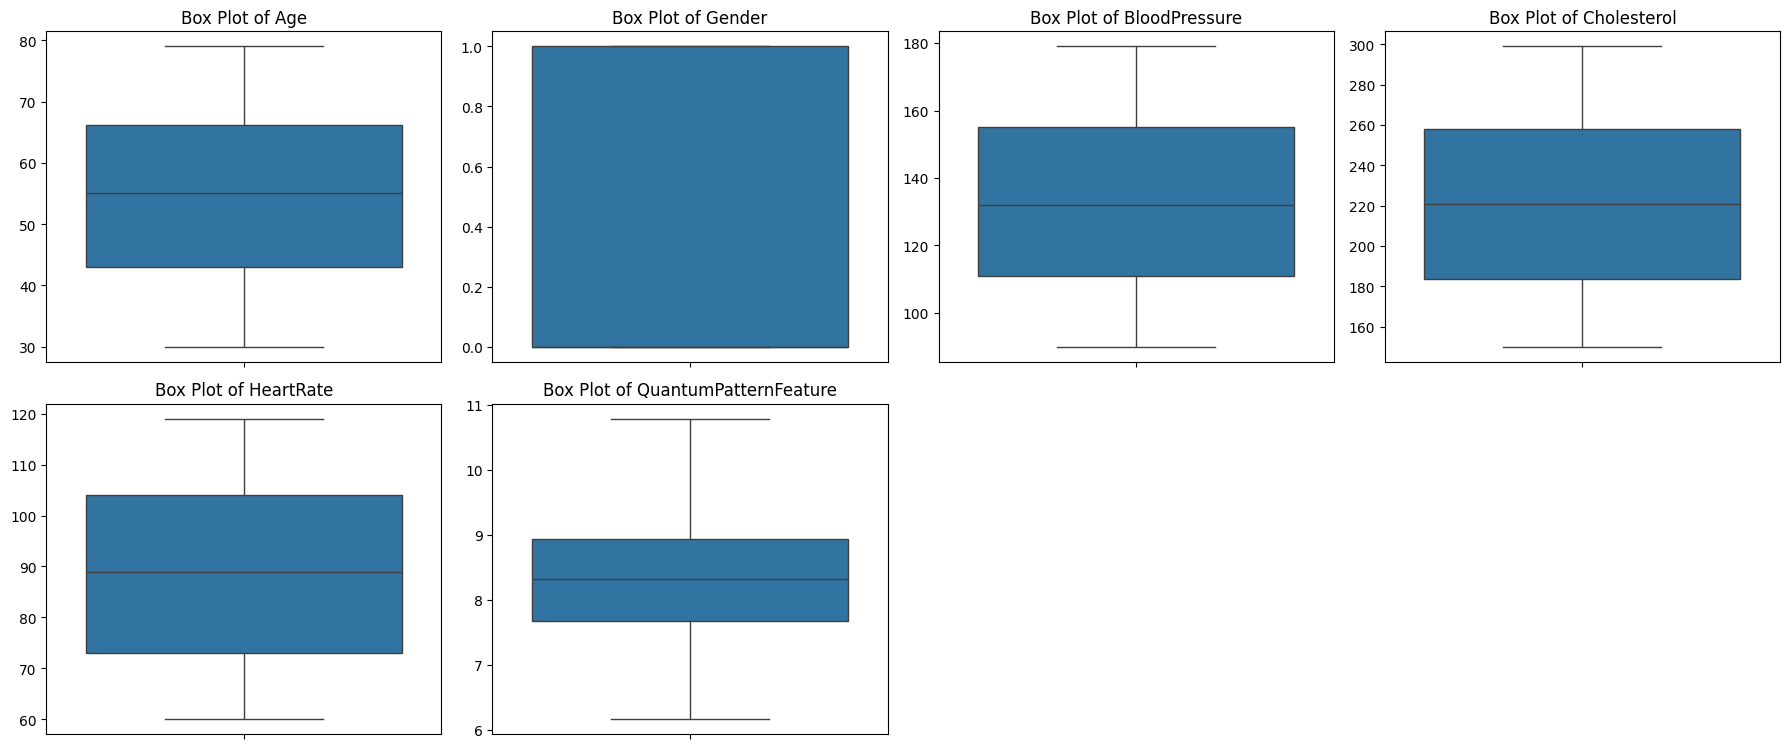

In [ ]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('HeartDisease')

plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

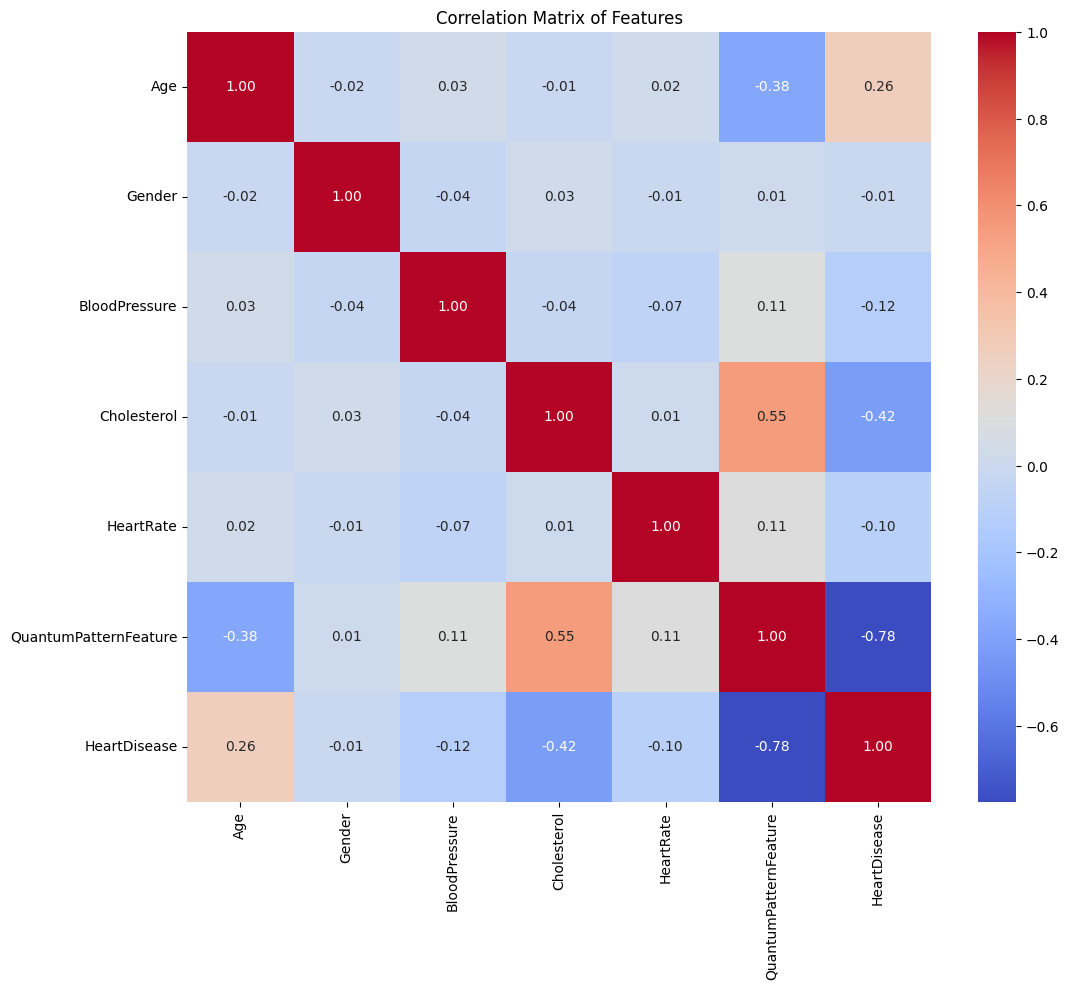

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

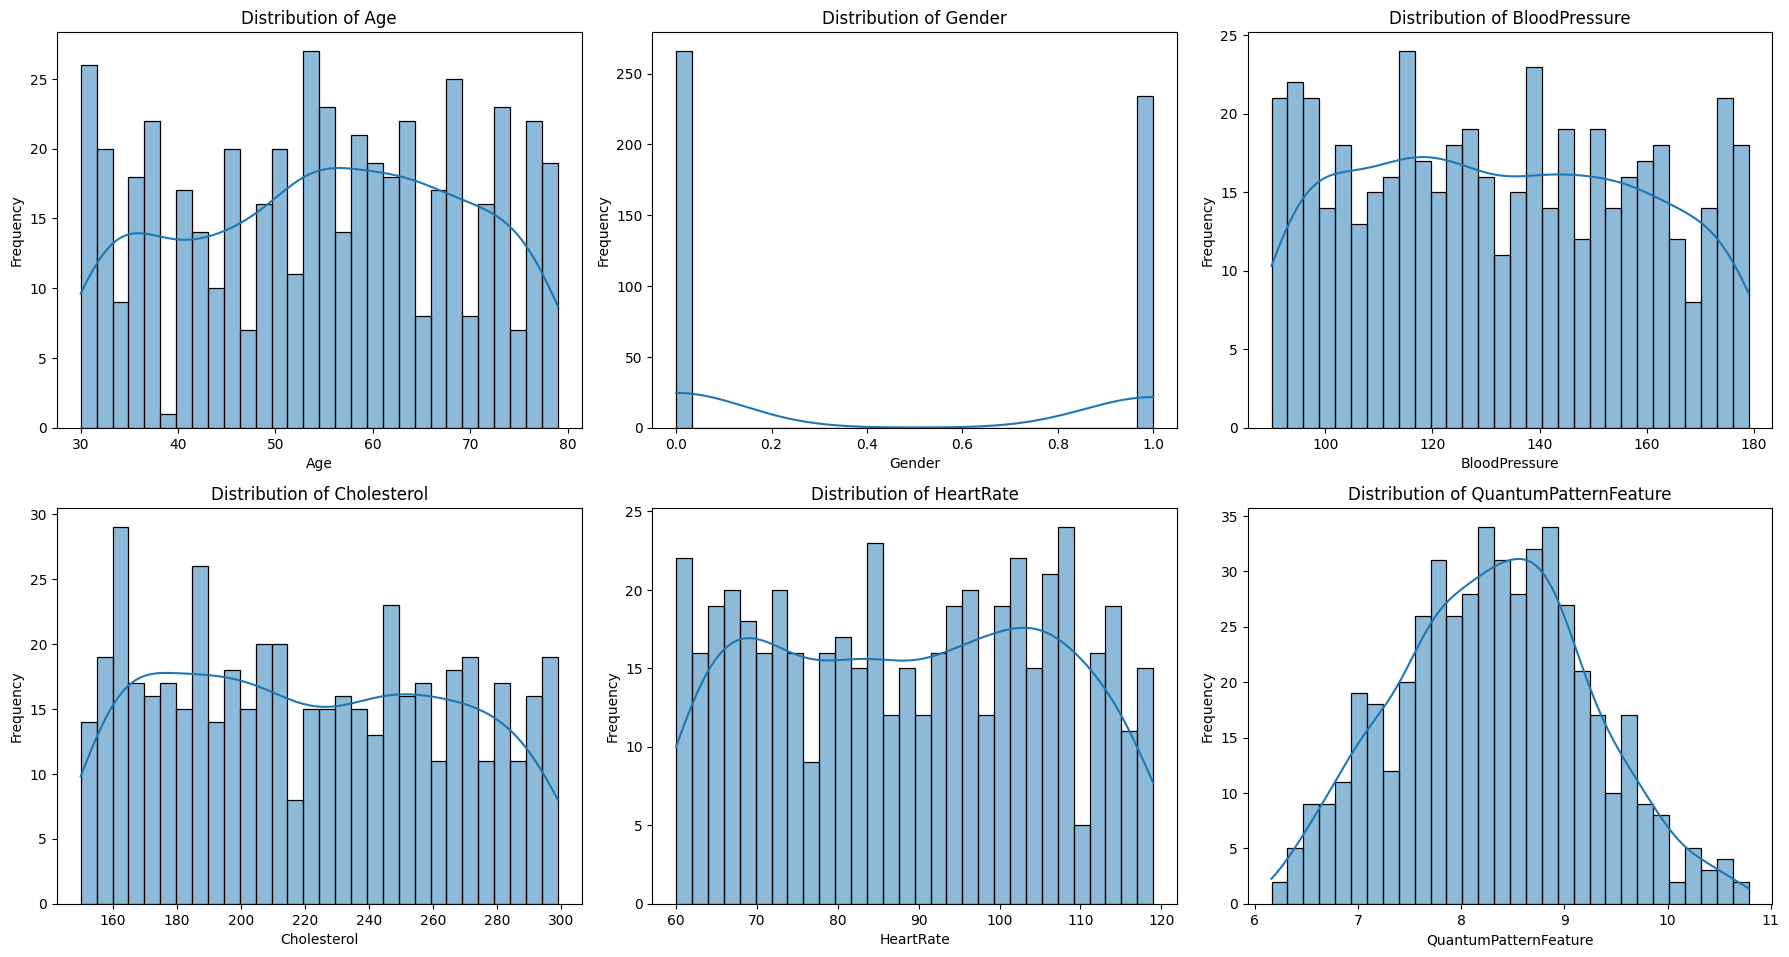

In [ ]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('HeartDisease')

plt.figure(figsize=(18, 14))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##Data Preparation

In [ ]:
print("Target unik (asli):", data["HeartDisease"].unique())
print("Jumlah data awal   :", len(data))

Target unik (asli): [1 0]
Jumlah data awal   : 500


In [ ]:
top3 = ["QuantumPatternFeature", "Cholesterol", "Age"]
target_col = "HeartDisease"

X3 = data[top3].values
y3 = data[target_col].astype(int).values

print("X3 shape:", X3.shape)
print("y3 shape:", y3.shape)
print("Unique labels in y3:", np.unique(y3))

X3 shape: (500, 3)
y3 shape: (500,)
Unique labels in y3: [0 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X3, y3, test_size=0.2, random_state=42, stratify=y3
)

print("Using features:", top3)
print("Train/Test sizes:", X_train.shape[0], "/", X_test.shape[0])
print("Train dist:", np.bincount(y_train), "Test dist:", np.bincount(y_test))

Using features: ['QuantumPatternFeature', 'Cholesterol', 'Age']
Train/Test sizes: 400 / 100
Train dist: [160 240] Test dist: [40 60]


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_q = scaler.fit_transform(X_train)
X_test_q  = scaler.transform(X_test)

print("Scaled range:", X_train_q.min(), "to", X_train_q.max())

Scaled range: 0.0 to 1.0000000000000002


##Modeling

In [ ]:
%pip install -U qiskit qiskit-machine-learning qiskit-aer scikit-learn imblearn

In [ ]:
import qiskit
import qiskit_aer
import qiskit_machine_learning

print("qiskit:", qiskit.__version__)
print("aer:", qiskit_aer.__version__)
print("qml:", qiskit_machine_learning.__version__)

qiskit: 2.2.3
aer: 0.17.2
qml: 0.9.0


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    balanced_accuracy_score
)

from qiskit.circuit.library import zz_feature_map
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC

In [ ]:
!pip install --upgrade pylatexenc
!pip install qiskit[visualization]

In [ ]:
num_qubits = 3

feature_map = zz_feature_map(
    feature_dimension=num_qubits,
    reps=1,
    entanglement="linear"
)

feature_map.draw("mpl")
plt.show()

qkernel = FidelityQuantumKernel(feature_map=feature_map)
qsvc = QSVC(quantum_kernel=qkernel)

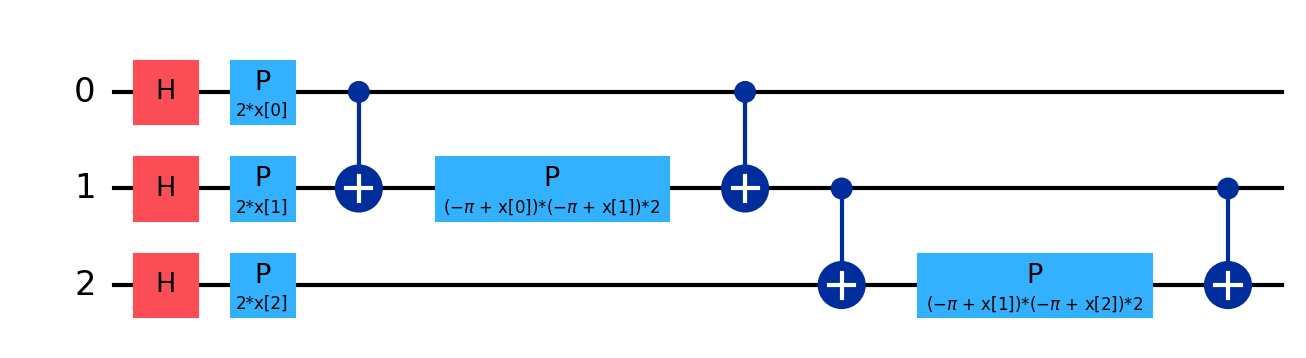

In [ ]:
# Menyimpan gambar diagram sirkuit ke file PNG
feature_map.draw("mpl", filename="quantum_circuit.png")

# Menampilkan gambar dari file
from IPython.display import Image
Image(filename="quantum_circuit.png")

In [ ]:
# Train
qsvc.fit(X_train_q, y_train)
print("QSVC (3-qubit feature selection) training done.")

QSVC (3-qubit feature selection) training done.


In [ ]:
# Predict
y_train_pred = qsvc.predict(X_train_q)
y_test_pred  = qsvc.predict(X_test_q)

In [ ]:
print("\n=== TRAIN PERFORMANCE ===")
print("Accuracy train      :", accuracy_score(y_train, y_train_pred))
print("Balanced Acc train  :", balanced_accuracy_score(y_train, y_train_pred))
print("F1 macro train      :", f1_score(y_train, y_train_pred, average="macro"))


=== TRAIN PERFORMANCE ===
Accuracy train      : 0.8825
Balanced Acc train  : 0.8729166666666666
F1 macro train      : 0.8763800393216683


In [ ]:
print("\n=== TEST PERFORMANCE ===")
print("Accuracy test       :", accuracy_score(y_test, y_test_pred))
print("Balanced Acc test   :", balanced_accuracy_score(y_test, y_test_pred))
print("F1 macro test       :", f1_score(y_test, y_test_pred, average="macro"))


=== TEST PERFORMANCE ===
Accuracy test       : 0.9
Balanced Acc test   : 0.8916666666666666
F1 macro test       : 0.8949138293400589


In [ ]:
print("\nClassification Report (test):")
print(classification_report(y_test, y_test_pred, digits=2))


Classification Report (test):
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.90      0.93      0.92        60

    accuracy                           0.90       100
   macro avg       0.90      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



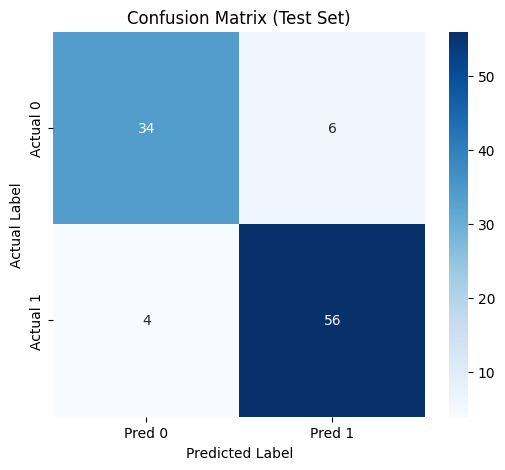

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
print("\nCONFIG QSVC:")
print("  Features used        :", top3)
print("  Scaling              : MinMax [0,1]")
print("  Feature map          : ZZFeatureMap")
print("  Reps                 : 1")
print("  Entanglement         : linear")
print("  Num qubits/features  :", num_qubits)
print("  Train/Test size      :", len(X_train_q), "/", len(X_test_q))


CONFIG QSVC:
  Features used        : ['QuantumPatternFeature', 'Cholesterol', 'Age']
  Scaling              : MinMax [0,1]
  Feature map          : ZZFeatureMap
  Reps                 : 1
  Entanglement         : linear
  Num qubits/features  : 3
  Train/Test size      : 400 / 100


#SVM KLASIK

In [ ]:
print("X_train_q shape:", X_train_q.shape)
print("X_test_q shape :", X_test_q.shape)
print("Num features   :", X_train_q.shape[1])
print("Train range    :", X_train_q.min(), "to", X_train_q.max())

X_train_q shape: (400, 3)
X_test_q shape : (100, 3)
Num features   : 3
Train range    : 0.0 to 1.0000000000000002


=== TRAIN PERFORMANCE (SVC RBF) ===
Accuracy train      : 0.92
Balanced Acc train  : 0.9260416666666667
F1 macro train      : 0.9180306872614565

=== TEST PERFORMANCE (SVC RBF) ===
Accuracy test       : 0.9
Balanced Acc test   : 0.9041666666666667
F1 macro test       : 0.8973727422003284

Classification Report (test):
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        40
           1       0.95      0.88      0.91        60

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



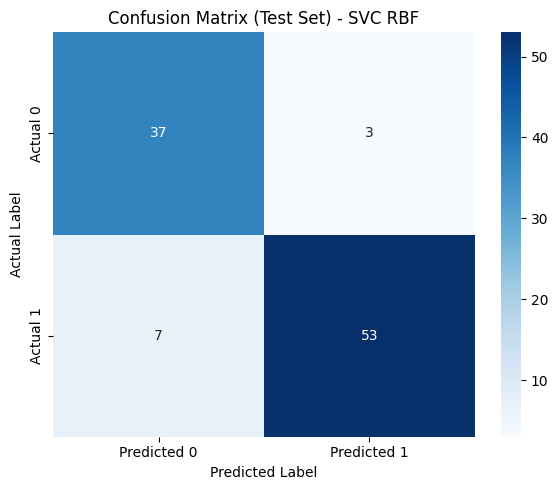

In [ ]:
from sklearn.svm import SVC

# Train model
svc = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    class_weight="balanced",
    random_state=42
)
svc.fit(X_train_q, y_train)
# Predict
y_train_pred = svc.predict(X_train_q)
y_test_pred  = svc.predict(X_test_q)

# TRAIN PERFORMANCE
print("=== TRAIN PERFORMANCE (SVC RBF) ===")
print("Accuracy train      :", accuracy_score(y_train, y_train_pred))
print("Balanced Acc train  :", balanced_accuracy_score(y_train, y_train_pred))
print("F1 macro train      :", f1_score(y_train, y_train_pred, average="macro"))

# TEST PERFORMANCE
print("\n=== TEST PERFORMANCE (SVC RBF) ===")
print("Accuracy test       :", accuracy_score(y_test, y_test_pred))
print("Balanced Acc test   :", balanced_accuracy_score(y_test, y_test_pred))
print("F1 macro test       :", f1_score(y_test, y_test_pred, average="macro"))

print("\nClassification Report (test):")
print(classification_report(y_test, y_test_pred, digits=2))

# Confusion Matrix (Test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted 0', 'Predicted 1'],
    yticklabels=['Actual 0', 'Actual 1']
)
plt.title('Confusion Matrix (Test Set) - SVC RBF')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()